## Importing Libraries and dataset

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import sklearn.svm as svm 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

import sklearn.metrics as metrics 

import seaborn as sns 

In [2]:
df1 = pd.read_csv("./EEG_data.csv")

In [3]:
df1.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [4]:
df3 = df1[['SubjectID', 'VideoID', 'user-definedlabeln']]

In [5]:
df3.head()

,SubjectID,VideoID,user-definedlabeln
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [93]:
vid = 8
sid = 9

In [94]:
df4 = df3.loc[(df3['VideoID'] == vid) & (df3['SubjectID'] == sid)]

In [95]:
df4.head()

,SubjectID,VideoID,user-definedlabeln
12565,9.0,8.0,1.0
12566,9.0,8.0,1.0
12567,9.0,8.0,1.0
12568,9.0,8.0,1.0
12569,9.0,8.0,1.0


In [4]:
df2 = pd.read_csv("./demographic_info.csv")

In [5]:
df2.head()

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


## Preprocessing

### Rename column 'subject ID' in df2 to 'SubjectID' so that we can perform inner join.

In [6]:
df2 = df2.rename(columns = {'subject ID': 'SubjectID'})

### Perform Inner join

In [7]:
df = pd.merge(df1, df2, on='SubjectID', how='inner')

In [8]:
df.shape

(12811, 18)

In [9]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


### Perform one-hot encoding for categorical values

In [10]:
df = pd.get_dummies(df)

In [11]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity_Bengali,ethnicity_English,ethnicity_Han Chinese,gender_F,gender_M
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,33228.0,8293.0,0.0,0.0,25,0,0,1,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,5293.0,2740.0,0.0,0.0,25,0,0,1,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,57243.0,25354.0,0.0,0.0,25,0,0,1,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,49960.0,33932.0,0.0,0.0,25,0,0,1,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,44790.0,29749.0,0.0,0.0,25,0,0,1,0,1


### Drop the columns 'SubjectID', 'VideoID', 'predefinedlabel' as they are not useful in predictions

In [12]:
df.drop(columns = ['SubjectID','VideoID','predefinedlabel'],inplace=True)

In [13]:
df.head()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln,age,ethnicity_Bengali,ethnicity_English,ethnicity_Han Chinese,gender_F,gender_M
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,25,0,0,1,0,1
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,25,0,0,1,0,1
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,25,0,0,1,0,1
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,25,0,0,1,0,1
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,25,0,0,1,0,1


### Seperate x and y

In [14]:
y = df['user-definedlabeln']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: user-definedlabeln, dtype: float64

In [15]:
df.drop(columns = ['user-definedlabeln'], inplace=True)
x = df
x.head()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,age,ethnicity_Bengali,ethnicity_English,ethnicity_Han Chinese,gender_F,gender_M
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,25,0,0,1,0,1
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,25,0,0,1,0,1
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,25,0,0,1,0,1
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,25,0,0,1,0,1
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,25,0,0,1,0,1


In [16]:
x.drop(columns = ['Alpha2'], inplace=True)
x.head()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Beta1,Beta2,Gamma1,Gamma2,age,ethnicity_Bengali,ethnicity_English,ethnicity_Han Chinese,gender_F,gender_M
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,27946.0,45097.0,33228.0,8293.0,25,0,0,1,0,1
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2746.0,3687.0,5293.0,2740.0,25,0,0,1,0,1
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,36293.0,130536.0,57243.0,25354.0,25,0,0,1,0,1
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,11488.0,62462.0,49960.0,33932.0,25,0,0,1,0,1
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,45307.0,99603.0,44790.0,29749.0,25,0,0,1,0,1


### Train-Test Split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9608, 16)
(9608,)
(3203, 16)
(3203,)


/home/sai/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user-definedlabeln', ylabel='count'>

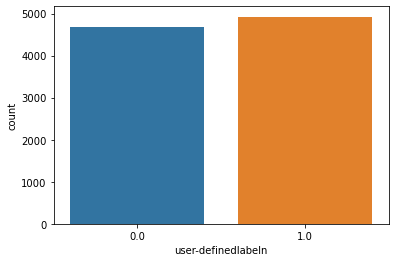

In [19]:
sns.countplot(y_train)

In [20]:
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(x_train)

test_x_scaled = scaler.transform(x_test)

# train_x_scaled = x_train
# test_x_scaled = x_test

## Models

### Naive bayes

In [21]:
gnb = GaussianNB()
gnb.fit(train_x_scaled, y_train)

GaussianNB()

In [22]:
test_yhat_nb = gnb.predict_proba(test_x_scaled)[:,-1]

In [23]:
metrics.roc_auc_score(y_test, test_yhat_nb)

0.6285047531135372

### SVM

In [24]:
svm_model = SVC(kernel = 'rbf',class_weight = "balanced",C = 5, probability = True)
svm_model.fit(train_x_scaled, y_train)

SVC(C=5, class_weight='balanced', probability=True)

In [25]:
test_yhat = svm_model.predict_proba(test_x_scaled)[:,-1]

In [26]:
metrics.roc_auc_score(y_test, test_yhat)

0.7334212585860745

### Logistic Regression

In [27]:
logistic_regression_model = LogisticRegression(max_iter=1000, class_weight = "balanced", C=1.5)
logistic_regression_model.fit(train_x_scaled, y_train)

LogisticRegression(C=1.5, class_weight='balanced', max_iter=1000)

In [28]:
test_yhat1 = logistic_regression_model.predict_proba(test_x_scaled)[:,-1]

In [29]:
metrics.roc_auc_score(y_test, test_yhat1)

0.62581335085336

### AdaBoost

In [30]:
clf1 = AdaBoostClassifier(n_estimators=1000, random_state=0,learning_rate = 0.1)
clf1.fit(train_x_scaled, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000, random_state=0)

In [31]:
test_yhat_ada = clf1.predict_proba(test_x_scaled)[:,-1]

In [32]:
metrics.roc_auc_score(y_test, test_yhat_ada)

0.6659621982535635

### XGBoost

In [33]:
xgbc = xgb.XGBClassifier(n_estimators=1000, random_state=0,learning_rate = 0.05,use_label_encoder=False)
xgbc.fit(train_x_scaled, y_train)

[10:33:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [34]:
test_yhat_xgbc = xgbc.predict_proba(test_x_scaled)[:,-1]

In [35]:
metrics.roc_auc_score(y_test, test_yhat_xgbc)

0.7397647905204587

### Bagging

In [36]:
bagg = BaggingClassifier(base_estimator=SVC(),n_estimators=2000, random_state=0, max_samples = 300)
bagg.fit(train_x_scaled, y_train)

BaggingClassifier(base_estimator=SVC(), max_samples=30, n_estimators=1000,
                  random_state=0)

In [37]:
test_yhat_bag = bagg.predict_proba(test_x_scaled)[:,-1]

In [38]:
metrics.roc_auc_score(y_test, test_yhat_bag)

0.6372960429344692

### Decision Tree

In [39]:
dt = DecisionTreeClassifier(class_weight = "balanced" ,random_state=0)
dt.fit(train_x_scaled, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [40]:
test_yhat_dt = dt.predict_proba(test_x_scaled)[:,-1]

In [41]:
metrics.roc_auc_score(y_test, test_yhat_dt)

0.6113497703227497

### KNeighbours Classifier

In [42]:
knc = KNeighborsClassifier(n_neighbors=60, weights='uniform', algorithm='auto')
knc.fit(train_x_scaled, y_train)

KNeighborsClassifier(n_neighbors=60)

In [43]:
test_yhat_knc = knc.predict_proba(test_x_scaled)[:,-1]

In [44]:
metrics.roc_auc_score(y_test, test_yhat_knc)

0.7087493884506715